# Assignment 1
MLP Model Creation

All the imports required

In [1]:
# importing sys
from matplotlib import pyplot as plt
from PreProcessor import FeatureVectorGenerator
from Tests import FeatureVectorGeneratorTest, PickleTest
from Utils import GetData
import numpy as np


filepath declerations

In [ ]:
mlp_filepath = 'TrainedModels/mlp_model'
mlp_aug_filepath = 'TrainedModels/mlp_model_aug'

svm_filepath = 'TrainedModels/svm_model'
svm_aug_filepath = 'TrainedModels/svm_model_aug'

knn_filepath = 'TrainedModels/knn_model'
knn_aug_filepath = 'TrainedModels/knn_model_aug'

logistic_filepath = 'TrainedModels/logistic_model'
logistic_aug_filepath = 'TrainedModels/logistic_model_aug'

dtc_filepath = 'TrainedModels/dtc_model'
dtc_aug_filepath = 'TrainedModels/dtc_model_aug'

## Preparing the Data


Importing the data

In [2]:
# importing the raw data by unpickling the data
raw_data = GetData.get_train_data_all()
raw_data_aug = GetData.get_train_data_aug()

# importing the labels
raw_labels = GetData.get_labels()

# importing the test data
raw_test_data = GetData.get_test_data()

# Testing the input data
PickleTest.test_data_all(raw_data) # to be removed
PickleTest.test_data(raw_test_data) # to be removed

PickleTest.test_labels(raw_labels) # to be removed

Generating the feature vector

In [3]:
# declaring the batch size
batch_size = 1024

# initializing x vectors
x_train = np.zeros((raw_data[b'data'].shape[0], 512)).astype(np.float32)

for i in range(0, raw_data[b'data'].shape[0], batch_size):
    x_train[i:i+batch_size] = FeatureVectorGenerator.generate_feature_vector(raw_data[b'data'][i:i+batch_size])

/home/saicharanm22/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/saicharanm22/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [4]:
x_test = np.zeros((raw_test_data[b'data'].shape[0], 512)).astype(np.float32)

# feature vector for test data
for i in range(0, raw_test_data[b'data'].shape[0], batch_size):
    x_test[i:i+batch_size] = FeatureVectorGenerator.generate_feature_vector(raw_test_data[b'data'][i:i+batch_size])

In [5]:
x_train_aug = np.zeros((raw_data_aug[b'data'].shape[0], 512)).astype(np.float32)

# feature vector for augmented data
for i in range(0, raw_data_aug[b'data'].shape[0], batch_size):
    x_train_aug[i:i+batch_size] = FeatureVectorGenerator.generate_feature_vector(raw_data_aug[b'data'][i:i+batch_size])

One hot encoding

In [6]:
# one hot encoding the data to get y matrix
y_train = FeatureVectorGenerator.one_hot_encoding(raw_data[b'labels'])
y_train_aug = FeatureVectorGenerator.one_hot_encoding(raw_data_aug[b'labels'])

y_test = FeatureVectorGenerator.one_hot_encoding(raw_test_data[b'labels'])

# raw data without onehot encoding
y_train_raw = raw_data[b'labels']
y_train_raw_aug = raw_data_aug[b'labels']

y_test_raw = raw_test_data[b'labels']


Normalizing the data using a scalar

In [7]:
# normalizing the train and test data
minimum = np.min(x_train)
scaler = np.max(x_train) - np.min(x_train)
x_train = (x_train - minimum) / scaler
x_test = (x_test - minimum) / scaler

# normalizing the augmented train and test data
minimum = np.min(x_train_aug)
scaler = np.max(x_train_aug) - np.min(x_train_aug)
x_train_aug = (x_train_aug - minimum) / scaler
x_test_aug = (x_test - minimum) / scaler # scaled using a scaler for augmented train data

## Training the Model

In [13]:
from Model.MLP_Model import NeuralNeworks

mlp_model = NeuralNeworks(512, 64, 64, 10)
mlp_model_aug = NeuralNeworks(512, 64, 64, 10)

Training the model with x_train and y_train

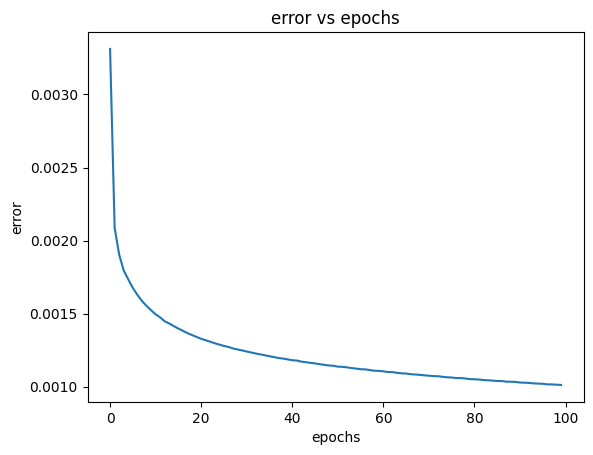

In [14]:
err = mlp_model.fit(x_train, y_train, epochs=100)

# plotting the error vs epochs graph
plt.plot(err)
plt.xlabel('epochs')
plt.ylabel('error')
plt.title('error vs epochs')
plt.show()

Training the model with augmented training set

In [15]:
err_aug = mlp_model_aug.fit(x_train_aug, y_train_aug, epochs=100)

# plotting the error vs epochs graph
plt.plot(err_aug)
plt.xlabel('epochs')
plt.ylabel('error')
plt.title('error vs epochs')
plt.show()

Pickling the model

In [ ]:
import pickle

pickle.dump(mlp_model, open(mlp_filepath, 'wb'))
pickle.dump(mlp_model_aug, open(mlp_aug_filepath, 'wb'))

# dumping the error data
pickle.dump(err, open('TrainedModels/etc/error_vs_epoch', 'wb'))
pickle.dump(err_aug, open('TrainedModels/etc/error_vs_epoch_aug', 'wb'))

## Using the Model to Predict the test data

In [ ]:
from sklearn import metrics
y_pred = mlp_model.predict(x_test)

acc_mlp_train = metrics.accuracy_score(y_train_raw, mlp_model.predict(x_train))
acc_mlp_test = metrics.accuracy_score(y_test_raw, y_pred)

print("Train set Accuracy: ", acc_mlp_train)
print("Test set Accuracy: ", acc_mlp_test)


In [ ]:
y_pred_aug = mlp_model_aug.predict(x_test_aug)

acc_mlp_train_aug = metrics.accuracy_score(y_train_raw_aug, mlp_model_aug.predict(x_train_aug))
acc_mlp_test_aug = metrics.accuracy_score(y_test_raw, y_pred_aug)

print("Augmented Train set Accuracy: ", acc_mlp_train_aug)
print("Augmented Test set Accuracy: ", acc_mlp_test_aug)

# Training The Machine Learning models Using the scikit learn package

1. SVM

In [ ]:
from sklearn import svm

# creating the model
svm_model = svm.SVC()
svm_model_aug = svm.SVC()

# training the model
svm_model.fit(x_train, y_train_raw)
svm_model_aug.fit(x_train_aug, y_train_raw_aug)

# saving the trained model
pickle.dump(svm_model, open(svm_filepath, 'wb'))
pickle.dump(svm_model_aug, open(svm_aug_filepath, 'wb'))

print("SVM Model Trained")

# predicting
svm_predict = svm_model.predict(x_test)
svm_predict_aug = svm_model_aug.predict(x_test_aug)

acc_svm_train = metrics.accuracy_score(y_train_raw, svm_model.predict(x_train))
acc_svm_test = metrics.accuracy_score(y_test_raw, svm_predict)

print("Train set Accuracy: ", acc_svm_train)
print("Test set Accuracy: ", acc_svm_test)

acc_svm_train_aug = metrics.accuracy_score(y_train_raw_aug, svm_model_aug.predict(x_train_aug))
acc_svm_test_aug = metrics.accuracy_score(y_test_raw, svm_predict_aug)

print("Augmented Train set Accuracy: ", acc_svm_train_aug)
print("Augmented Test set Accuracy: ", acc_svm_test_aug)


2. KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier()
KNN_model_aug = KNeighborsClassifier()

KNN_model.fit(x_train, y_train)
KNN_model_aug.fit(x_train_aug, y_train_aug)

# saving the trained model
pickle.dump(KNN_model, open(knn_filepath, 'wb'))
pickle.dump(KNN_model_aug, open(knn_aug_filepath, 'wb'))

print("KNN Model Trained")

# prediction
KNN_predict = KNN_model.predict(x_test)
KNN_predict_aug = KNN_model.predict(x_test_aug)

# calculating the accuracy
acc_knn_train = metrics.accuracy_score(y_train, KNN_model.predict(x_train))
acc_knn_test = metrics.accuracy_score(y_test, KNN_predict)

print("Train set Accuracy: ", acc_knn_train)
print("Test set Accuracy: ", acc_knn_test)

acc_knn_train_aug = metrics.accuracy_score(y_train_aug, KNN_model_aug.predict(x_train_aug))
acc_knn_test_aug = metrics.accuracy_score(y_test, KNN_predict_aug)

print("Augmented Train set Accuracy: ", acc_knn_train_aug)
print("Augmented Test set Accuracy: ", acc_knn_test_aug)

3. Logistic Regression Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=1000)
logistic_model_aug = LogisticRegression(max_iter=1000)

# training
logistic_model.fit(x_train, y_train_raw)
logistic_model_aug.fit(x_train_aug, y_train_raw_aug)

# saving the trained model
pickle.dump(logistic_model, open(logistic_filepath, 'wb'))
pickle.dump(logistic_model_aug, open(logistic_aug_filepath, 'wb'))

print("linear regression Model Trained")

# prediction
logistic_predict = logistic_model.predict(x_test)
logistic_predict_aug = logistic_model_aug.predict(x_test_aug)

# calculating the accuracy
acc_logistic_train = metrics.accuracy_score(y_train_raw, logistic_model.predict(x_train))
acc_logistic_test = metrics.accuracy_score(y_test_raw, logistic_predict)

print("Train set Accuracy: ", acc_logistic_train)
print("Test set Accuracy: ", acc_logistic_test)

acc_logistic_train_aug = metrics.accuracy_score(y_train_raw_aug, logistic_model_aug.predict(x_train_aug))
acc_logistic_test_aug = metrics.accuracy_score(y_test_raw, logistic_predict_aug)

print("Augmented Train set Accuracy: ", acc_logistic_train_aug)
print("Augmented Test set Accuracy: ", acc_logistic_test_aug)


4. Descision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_depth = 10

dtc_model = DecisionTreeClassifier(max_depth= max_depth)
dtc_model_aug = DecisionTreeClassifier(max_depth= max_depth)

# training the model
dtc_model.fit(x_train, y_train)
dtc_model_aug.fit(x_train_aug, y_train_aug)

# saving the trained model
pickle.dump(dtc_model, open(dtc_filepath, 'wb'))
pickle.dump(dtc_model_aug, open(dtc_aug_filepath, 'wb'))

print("Descision Tree Model Trained")

# predicting the model
dtc_predict = dtc_model.predict(x_test)
dtc_predict_aug = dtc_model_aug.predict(x_test_aug)

# calculating the accuracy
acc_dtc_train = metrics.accuracy_score(y_train, dtc_model.predict(x_train))
acc_dtc_test = metrics.accuracy_score(y_test, dtc_predict)

print("Train set Accuracy: ", acc_dtc_train)
print("Test set Accuracy: ", acc_dtc_test)

acc_dtc_train_aug = metrics.accuracy_score(y_train_aug, dtc_model_aug.predict(x_train_aug))
acc_dtc_test_aug = metrics.accuracy_score(y_test, dtc_predict_aug)

print("Augmented Train set Accuracy: ", acc_dtc_train_aug)
print("Augmented Test set Accuracy: ", acc_dtc_test_aug)


# Comparing the results of the models

comparing the results of prediction for test data

In [ ]:
x_label = ['MLP Model', 'SVM', 'KNN', 'Logistic Regression', 'Descision Tree']
x_org = [acc_mlp_test, acc_svm_test, acc_knn_test, acc_logistic_test, acc_dtc_test]
x_aug = [acc_mlp_test_aug, acc_svm_test_aug, acc_knn_test_aug, acc_logistic_test_aug, acc_dtc_test_aug]

x = np.arange(len(x_org))

plt.bar(x - 0.2, x_org, 0.4, label = 'Original Data')
plt.bar(x + 0.2, x_aug, 0.4, label = 'Augmented Data')
plt.xticks(x, x_label)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy of Test Data")
plt.ylim(0, 1)
plt.legend()
plt.show()

In [ ]:
x_label = ['MLP Model', 'SVM', 'KNN', 'Logistic Regression', 'Descision Tree']
x_org = [acc_mlp_train, acc_svm_train, acc_knn_train, acc_logistic_train, acc_dtc_train]
x_aug = [acc_mlp_train_aug, acc_svm_train_aug, acc_knn_train_aug, acc_logistic_train_aug, acc_dtc_train_aug]

x = np.arange(len(x_org))

plt.bar(x - 0.2, x_org, 0.4, label = 'Original Data')
plt.bar(x + 0.2, x_aug, 0.4, label = 'Augmented Data')
plt.xticks(x, x_label)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy of Test Data")
plt.ylim(0, 1)
plt.legend()
plt.show()